# AIN212 Course Project
  -Çağrı Çakıroğlu 2200765005 
 
  -Batuhan Efe Alkış 2210765035

-In this report, we tried to develop a model that can predict whether complications occur in surgeries.

**Definition of complication:**
-an extra medical problem that makes it more difficult to treat an existing illness:

Our data is publicly accessible from : https://drive.google.com/file/d/1KXv_fMiM6kFMqEUMbupFVciDDWPXlsbf/view?usp=share_link 

Also, it is from **TSHS**(Teaching of Statistics in the Health Sciences) 

In [171]:
#importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


# Step 1: Data Collection

In [172]:
data = pd.read_csv("Surgical-deepnet.csv")
data.head()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,...,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,...,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,...,0.00,0,0,7.88,11,0,0,0.00,1,0


## OVERVIEW OF DATA : 

**bmi:** Body Mass Index 

**age:** age

**asa_status:** American Society of Anesthesiologist Physical Status

**baseline_cancer:** Cancer

**baseline_charlson:** Charlson Comorbidity Index

**baseline_cvd:** Cardiovascular/Cerebrovascular Disease

**baseline_dementia:** Dementia

**baseline_diabetes:** Diabetes

**baseline_digestive:** Digestive Disease

**baseline_osteoart:** Osteoarthritis
 
**baseline_psych:** Psychiatric Disorder

**baseline_pulmonary:**  Pulmonary Disease

**ahrq_ccs:** United States Agency for Healthcare  Research and Quality’s Clinical Classifications Software (AHRQ-CCS) Procedure Category

**ccsComplicationRate:** Overall incidence of In-Hospital Complications for Each AHRQ-CCS Procedure Category

**ccsMort30Rate:** Overall Incidence of 30-day Mortality for Each AHRQ-CCS Procedure Category

**complication_rsi:** Risk Stratification Index (In-Hospital Complications)

**dow:** Day of Week

**gender:** Gender

**hour:** Operation Hour

**month:** Month of Year

**moonphase:** Phase of Moon

**mort30:** 30-Day Mortality

**mortality_rsi:** Risk Stratification Index (30-Day Mortality)

**race:** Race

**complication** : In-Hospital Complication

# Step 2: Data Preprocessing and Cleaning

In [173]:
data.info()
# checking values of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14635 entries, 0 to 14634
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bmi                  14635 non-null  float64
 1   Age                  14635 non-null  float64
 2   asa_status           14635 non-null  int64  
 3   baseline_cancer      14635 non-null  int64  
 4   baseline_charlson    14635 non-null  int64  
 5   baseline_cvd         14635 non-null  int64  
 6   baseline_dementia    14635 non-null  int64  
 7   baseline_diabetes    14635 non-null  int64  
 8   baseline_digestive   14635 non-null  int64  
 9   baseline_osteoart    14635 non-null  int64  
 10  baseline_psych       14635 non-null  int64  
 11  baseline_pulmonary   14635 non-null  int64  
 12  ahrq_ccs             14635 non-null  int64  
 13  ccsComplicationRate  14635 non-null  float64
 14  ccsMort30Rate        14635 non-null  float64
 15  complication_rsi     14635 non-null 

**In Here**, we looked the type of the attributes via .info() function and We checked whether there is string type data among the attributes. We saw all of them is integer or float

In [174]:
data.isnull().sum()
# there are no null values in the dataset

bmi                    0
Age                    0
asa_status             0
baseline_cancer        0
baseline_charlson      0
baseline_cvd           0
baseline_dementia      0
baseline_diabetes      0
baseline_digestive     0
baseline_osteoart      0
baseline_psych         0
baseline_pulmonary     0
ahrq_ccs               0
ccsComplicationRate    0
ccsMort30Rate          0
complication_rsi       0
dow                    0
gender                 0
hour                   0
month                  0
moonphase              0
mort30                 0
mortality_rsi          0
race                   0
complication           0
dtype: int64

we checked for null values we checked and found that the data has no null value.


<AxesSubplot: >

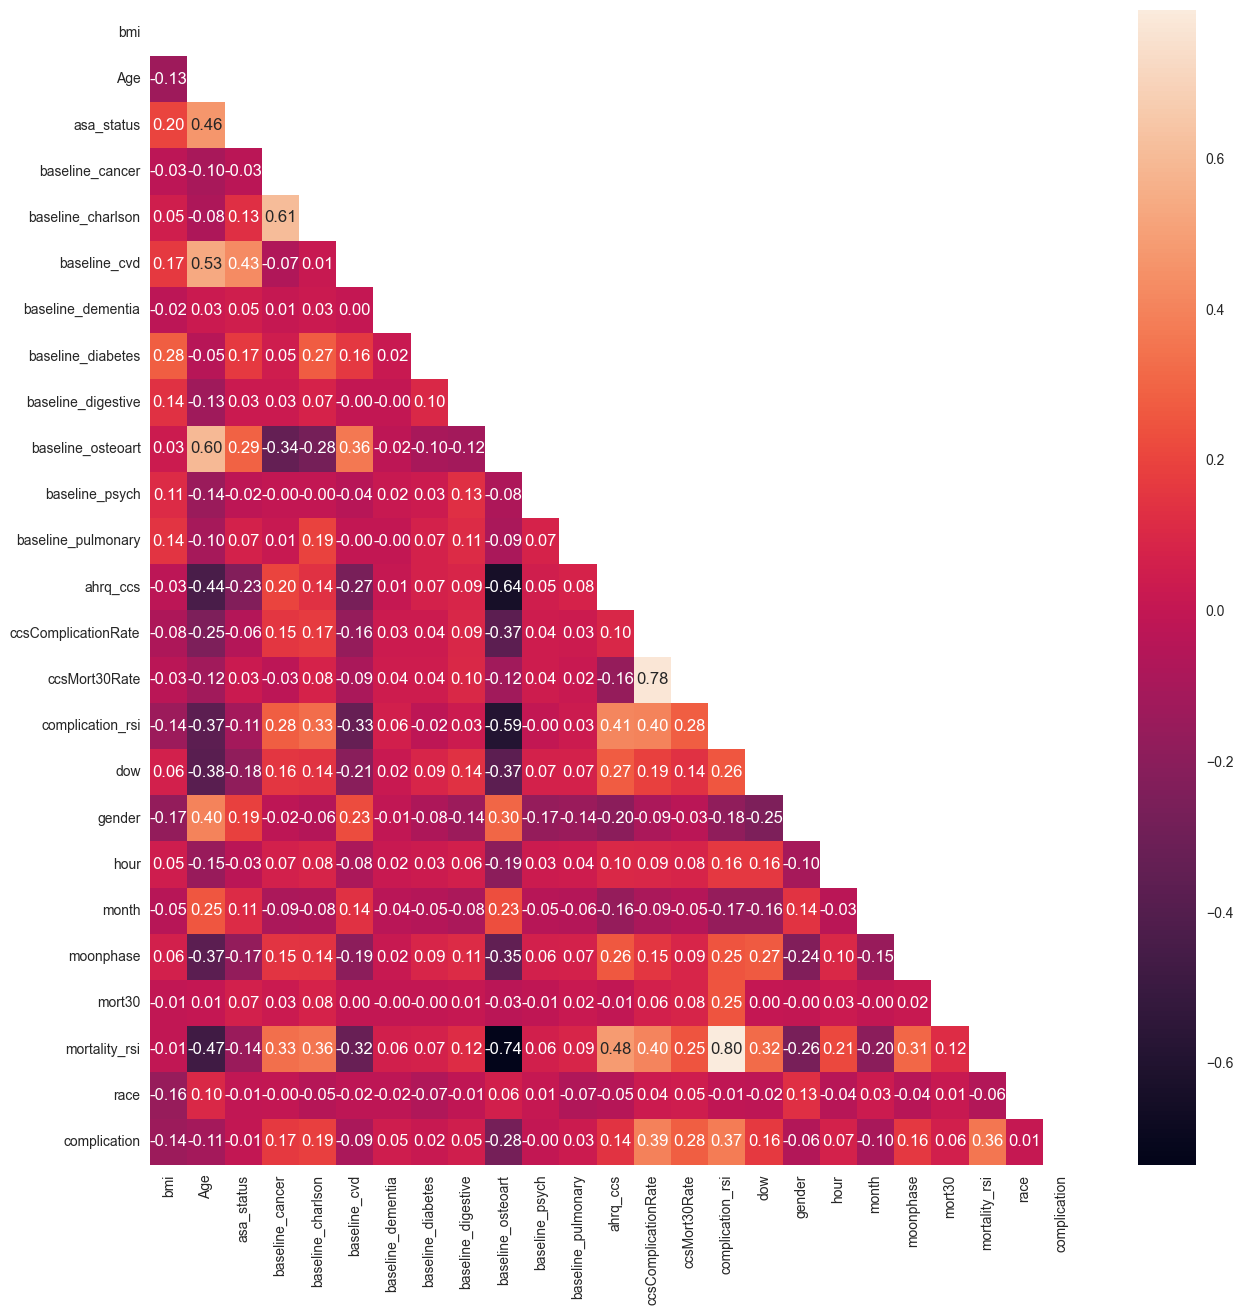

In [175]:
mask = np.triu(data.corr())
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data = data.corr(), annot = True, fmt=".2f", ax = ax, mask = mask)
#checking correlation between the data values

### Via Heatmap

We can visualize the correlation of variables and it shows us is it negativly correlated or positively correlated.
#### The most positively correlated ones are :
**Mortality_rsi** , **ccsComplicationRate**, **ccsMort30Rate** , **complication_rsi** , **mortality_rsi**

#### The most Negatively correlated ones are :
**bmi** , **baseline_osteoart** ,  **baseline_cvd** , **month**

In [176]:
data.columns

Index(['bmi', 'Age', 'asa_status', 'baseline_cancer', 'baseline_charlson',
       'baseline_cvd', 'baseline_dementia', 'baseline_diabetes',
       'baseline_digestive', 'baseline_osteoart', 'baseline_psych',
       'baseline_pulmonary', 'ahrq_ccs', 'ccsComplicationRate',
       'ccsMort30Rate', 'complication_rsi', 'dow', 'gender', 'hour', 'month',
       'moonphase', 'mort30', 'mortality_rsi', 'race', 'complication'],
      dtype='object')

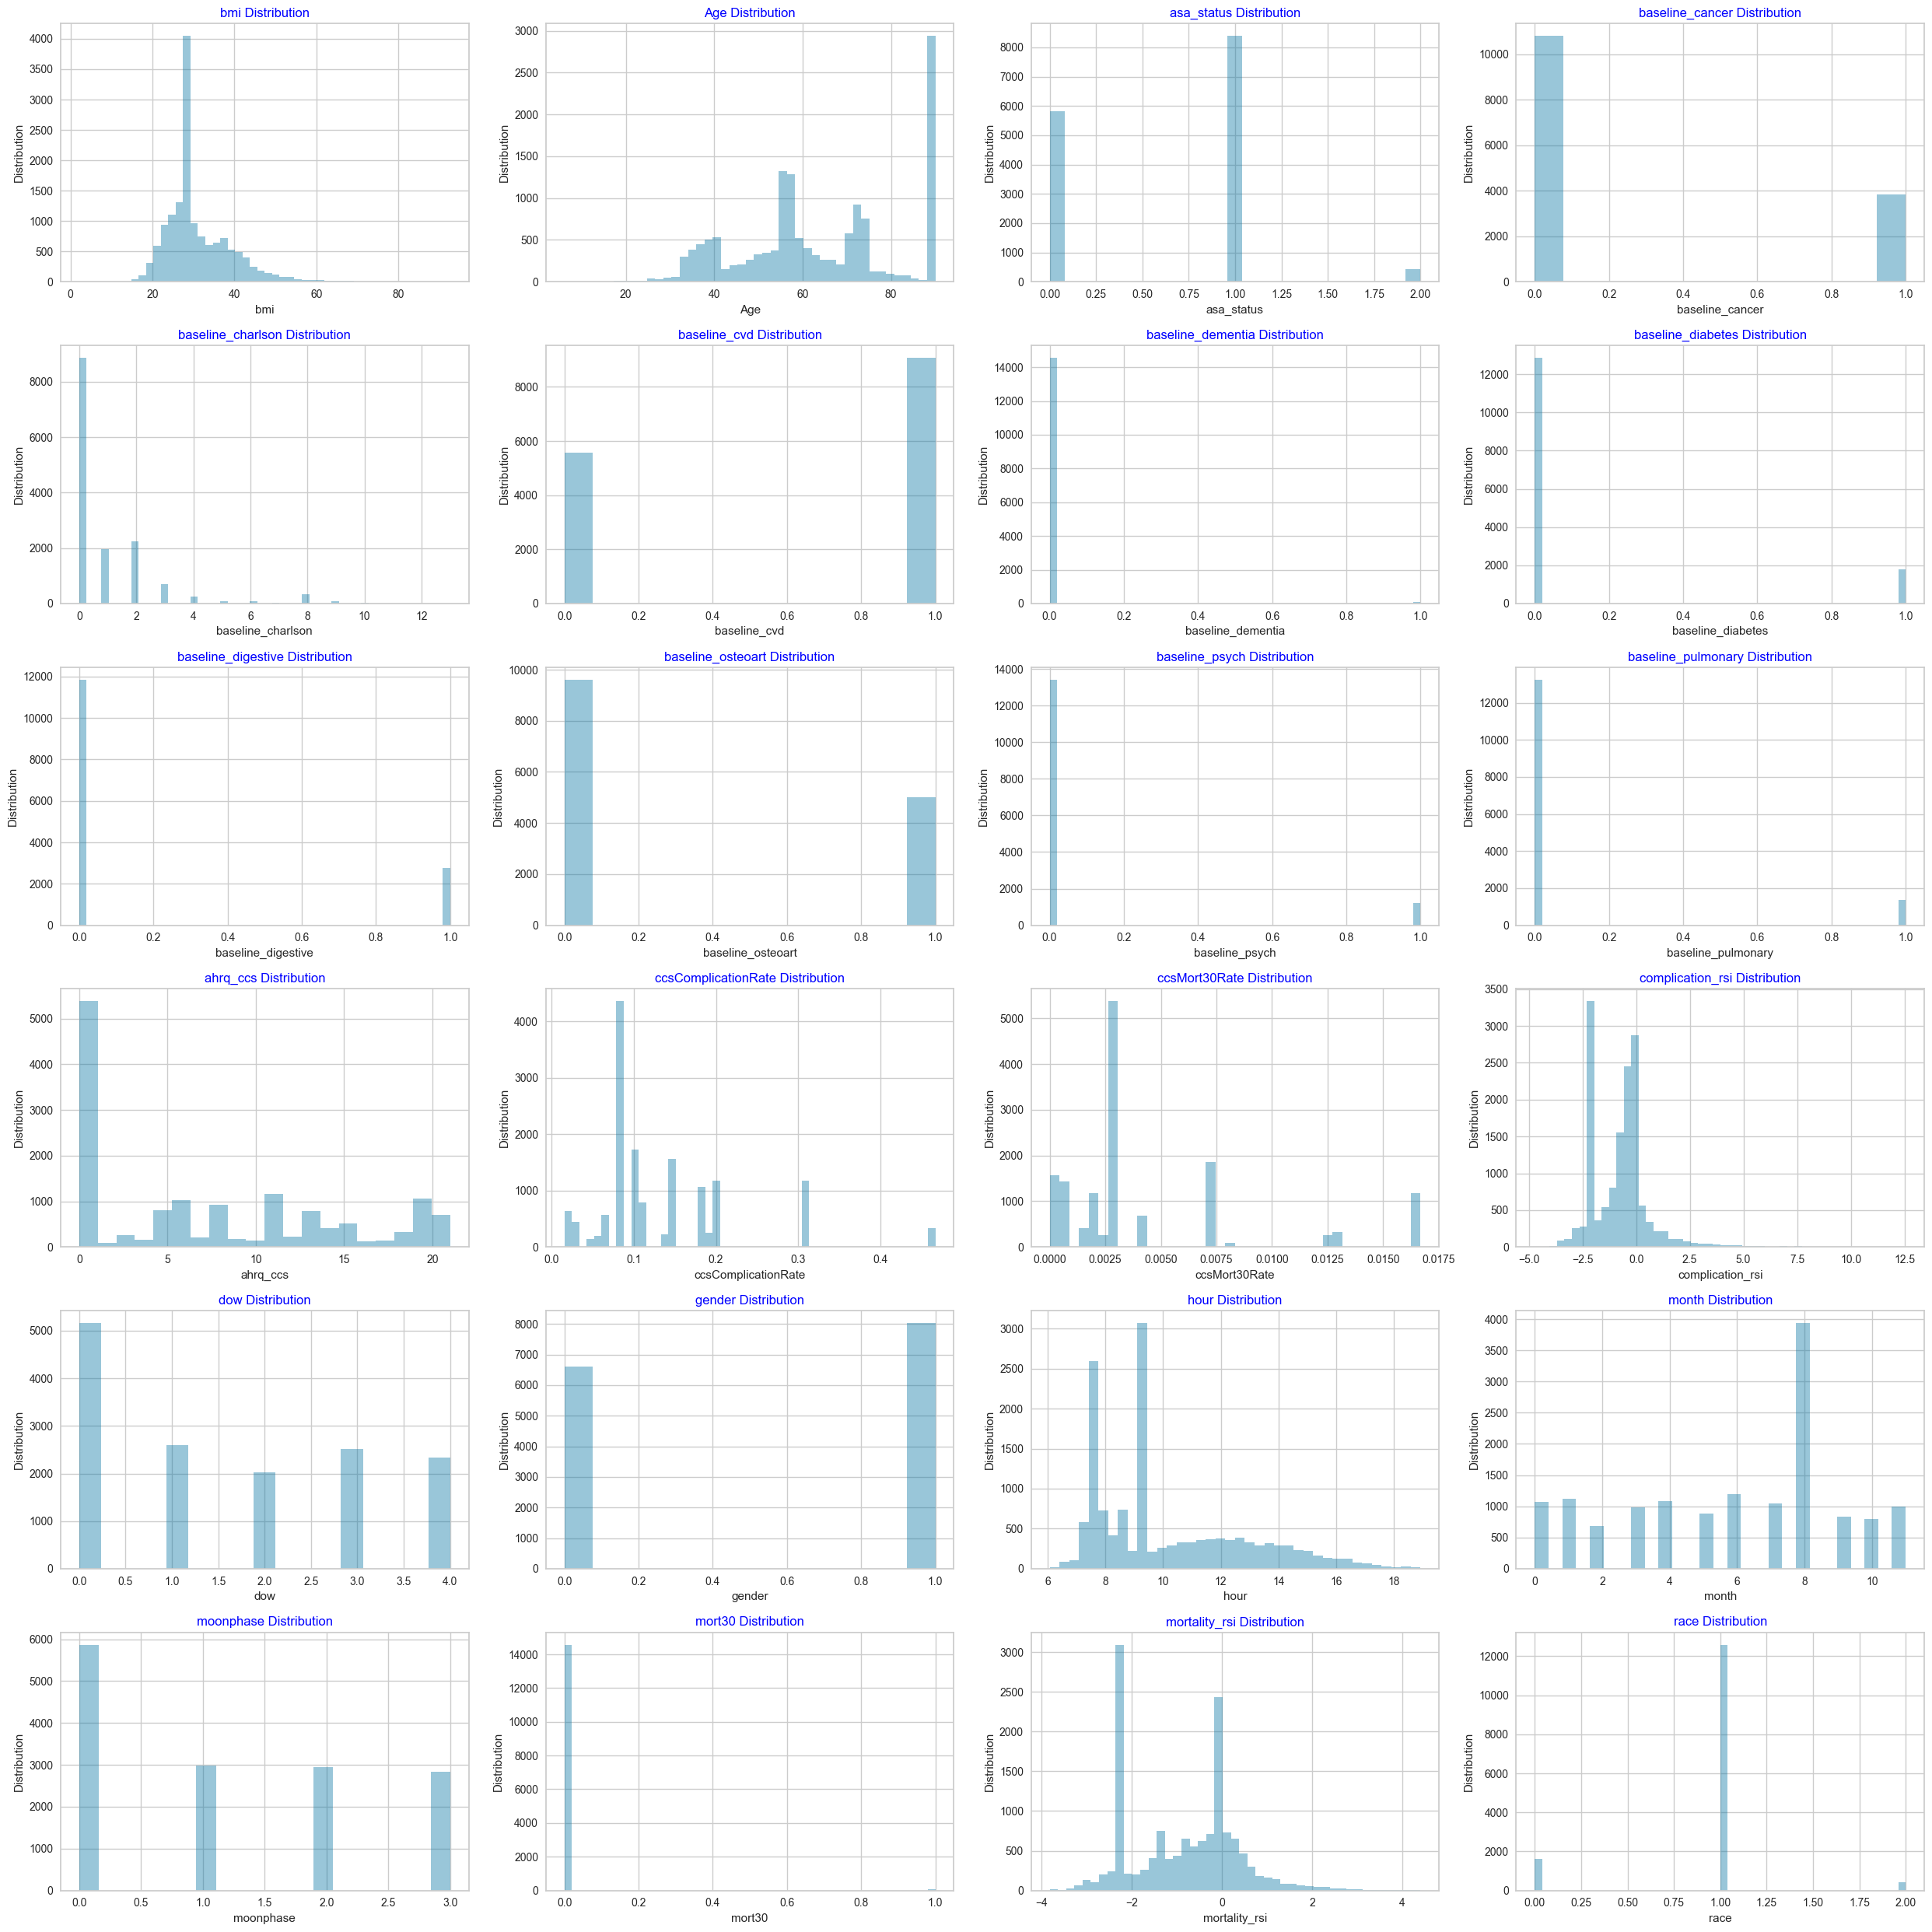

In [177]:
parameter_columns = ['bmi', 'Age', 'asa_status', 'baseline_cancer', 'baseline_charlson',
       'baseline_cvd', 'baseline_dementia', 'baseline_diabetes',
       'baseline_digestive', 'baseline_osteoart', 'baseline_psych',
       'baseline_pulmonary', 'ahrq_ccs', 'ccsComplicationRate',
       'ccsMort30Rate', 'complication_rsi', 'dow', 'gender', 'hour', 'month',
       'moonphase', 'mort30', 'mortality_rsi', 'race']
fig=plt.figure(figsize=(25,25))
for i, col in enumerate(parameter_columns):
    ax=fig.add_subplot(6,4,i+1)
    sns.distplot(data[col].ffill(),kde=False)
    ax.set_title(col+" Distribution",color='Blue')
    plt.ylabel('Distribution')
fig.tight_layout()

Above, we can see the distrubion of variable

<AxesSubplot: >

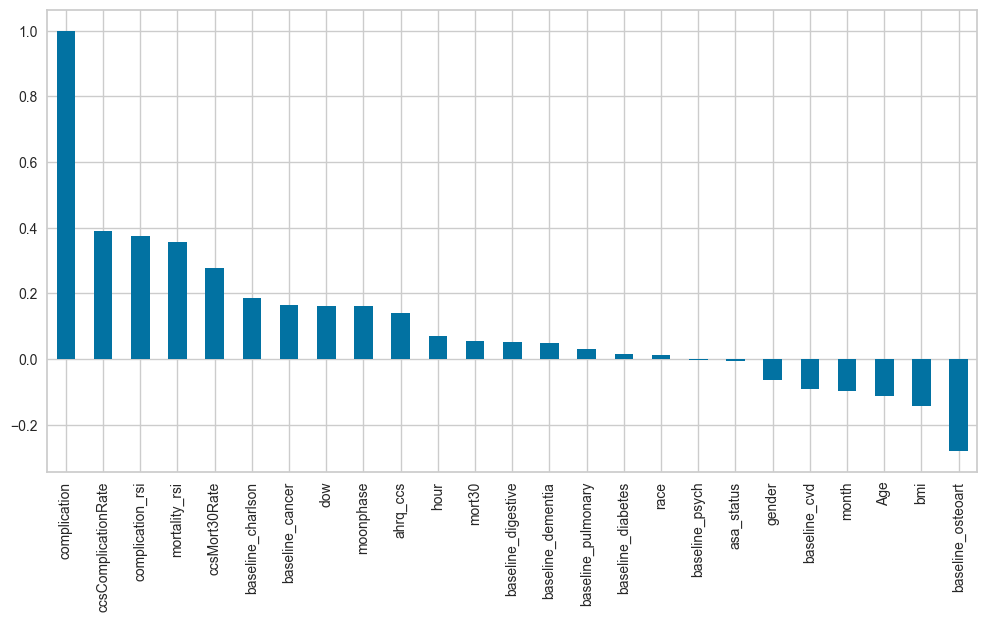

In [178]:
fig, ax = plt.subplots(figsize=(12,6))
data.corr()['complication'].sort_values(ascending=False).plot(kind = "bar", ax = ax)

### IN ABOVE 
Above, We can see how much the variables affect the result

cscComplicationRate, complication_rsi and mortality_rsi are 3 of the most influential

In [179]:
data.describe()
# looking at data values

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
count,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,...,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000,14635.000000
mean,31.295642,63.205268,0.632320,0.262316,0.977520,0.620294,0.004851,0.120875,0.189546,0.342740,...,-0.699044,1.606970,0.548890,10.171613,5.915408,1.187086,0.003963,-0.836712,0.919440,0.252135
std,8.152709,18.088191,0.539952,0.439909,1.758355,0.485330,0.069485,0.325993,0.391955,0.474642,...,1.339394,1.497738,0.497621,2.659881,3.239825,1.158357,0.062830,1.194111,0.364663,0.434253
min,2.150000,6.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-4.720000,0.000000,0.000000,6.070000,0.000000,0.000000,0.000000,-3.820000,0.000000,0.000000
25%,26.510000,51.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.970000,0.000000,0.000000,7.820000,3.000000,0.000000,0.000000,-2.250000,1.000000,0.000000
50%,28.980000,59.700000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,-0.580000,1.000000,1.000000,9.120000,7.000000,1.000000,0.000000,-0.640000,1.000000,0.000000
75%,35.295000,74.700000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,3.000000,1.000000,12.050000,8.000000,2.000000,0.000000,0.000000,1.000000,1.000000
max,92.590000,90.000000,2.000000,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,12.560000,4.000000,1.000000,18.920000,11.000000,3.000000,1.000000,4.400000,2.000000,1.000000


In here we can see , mean , min , max , and standart devivation of all the variables

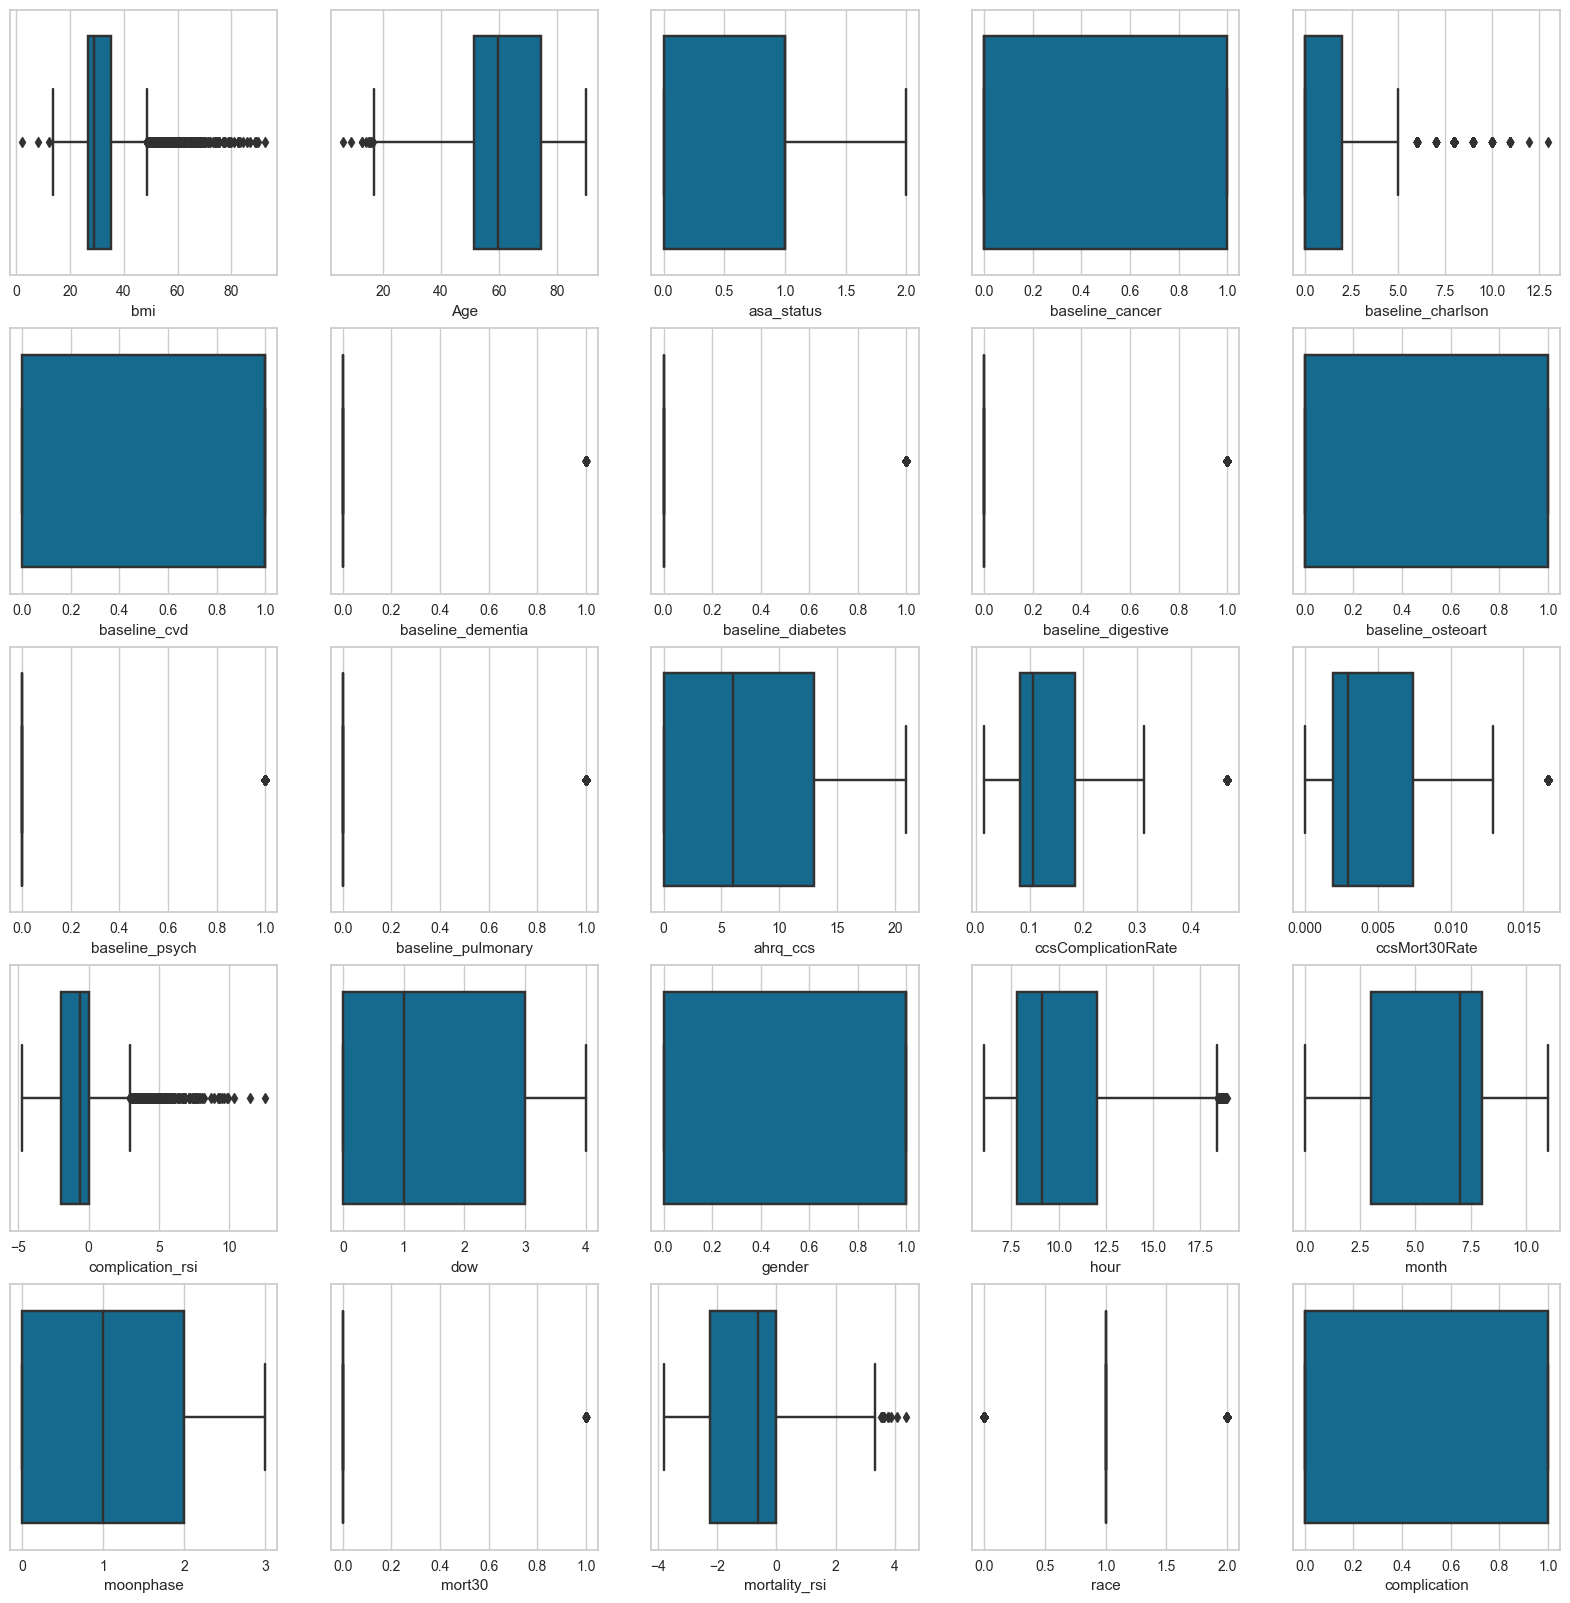

In [181]:
plt.subplots(ncols=5,nrows=5,figsize=(20,20))

for i in range(len(data.columns)):
    plt.subplot(5,5,i+1)
    sns.boxplot(data=data,x=data[data.columns[i]])

# VIA BOXPLOT 
we can easily detect the outliers , its shows us the Q1 and Q3 and IQR 

<Figure size 800x550 with 0 Axes>

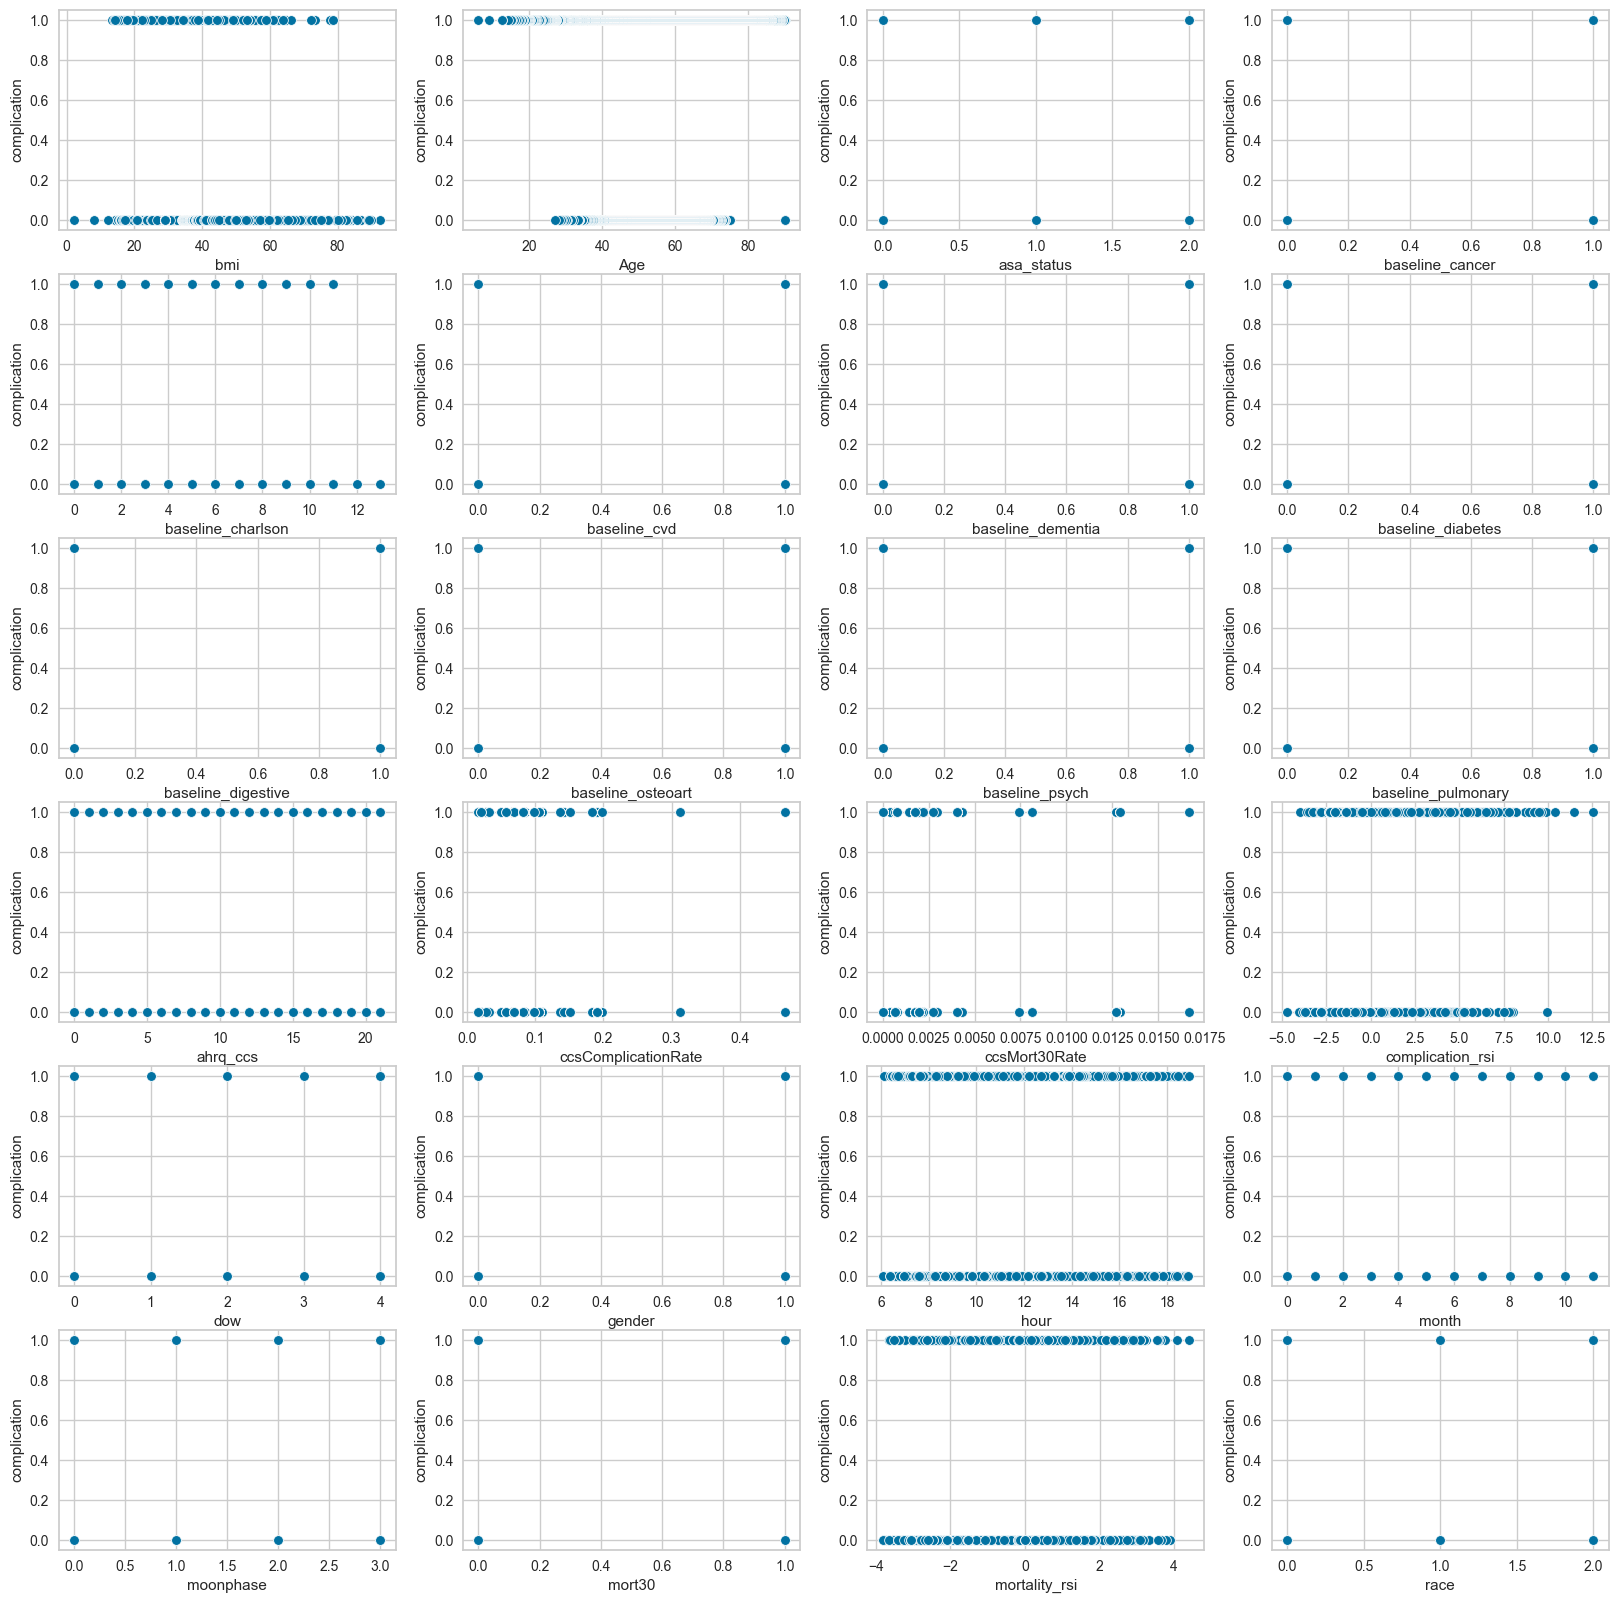

In [182]:
columns = ['bmi', 'Age', 'asa_status', 'baseline_cancer', 'baseline_charlson',
       'baseline_cvd', 'baseline_dementia', 'baseline_diabetes',
       'baseline_digestive', 'baseline_osteoart', 'baseline_psych',
       'baseline_pulmonary', 'ahrq_ccs', 'ccsComplicationRate',
       'ccsMort30Rate', 'complication_rsi', 'dow', 'gender', 'hour', 'month',
       'moonphase', 'mort30', 'mortality_rsi', 'race']

plt.figure()
plt.subplots(ncols=6,nrows=4,figsize=(20,20))
plt.clf()
for i in range(len(columns)):
    plt.subplot(6,4,i+1)
    sns.scatterplot(data=data,x=data[data.columns[i]],y = 'complication')

# TO DROP OUTLIERS
we will use the IQR*1.5 For every variable but bmi because bmi has a lot of outliers so we made it 1.2 IQR

Dropping variables which **greater than** Q3+1.5*IQR and **smaller than** Q1-1.5*IQR

In [183]:
def clean_outliers(col,data):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1	
    upper = data[col] > Q3 + 1.5*IQR
    lower = data[col] < Q1 - 1.5*IQR	
    data = data.drop(data[(upper == True) | (lower == True)].index,axis=0)	
    return data

In [184]:
# for bmi
new_data = data.copy()
Q1 = new_data['bmi'].quantile(0.25)
Q3 = new_data['bmi'].quantile(0.75)
IQR = Q3 - Q1	
upper = new_data['bmi'] > Q3 + 1.2*IQR
lower = new_data['bmi'] < Q1 - 1.2*IQR	
new_data = new_data.drop(new_data[(upper == True) | (lower == True)].index,axis=0)

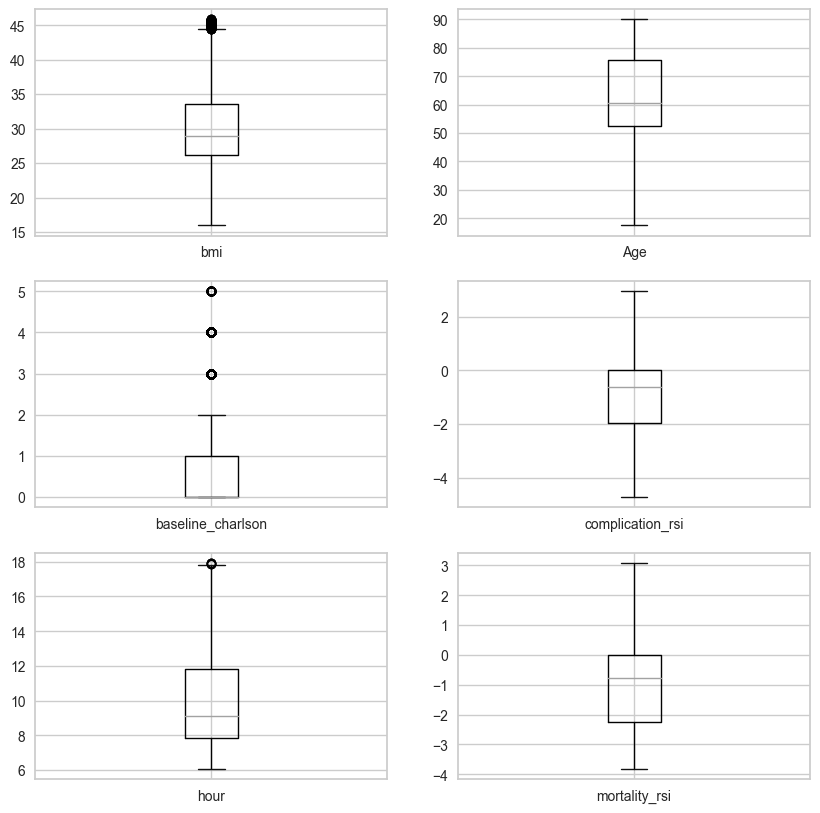

In [185]:
outlier_columns = ['Age','baseline_charlson','complication_rsi','hour','mortality_rsi']
i = 2
plt.subplots(ncols=3,nrows=2,figsize=(10,10))
plt.subplot(3,2,1)
new_data.boxplot('bmi',grid=True)
for col in outlier_columns:
    plt.subplot(3,2,i)
    new_data = clean_outliers(col=col,data=new_data)
    new_data.boxplot(col,grid=True)
    i = i+1

#### In above we checked the variables which has a lot of outliers , so we can see that many of them is dropped

In [186]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(data)
df_scaled = pd.DataFrame(scaled_df,columns=data.columns)
df_scaled.head()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,-1.470192,-0.221438,0.680973,1.676959,-0.555947,-1.27813,-0.069821,-0.370802,-0.483607,-0.722127,...,0.096348,0.930121,-1.103065,-0.955569,0.026111,-0.161515,-0.063078,0.340610,0.220924,-0.580638
1,-1.541337,-0.226966,-1.171107,-0.596318,-0.555947,-1.27813,-0.069821,-0.370802,-0.483607,-0.722127,...,0.678721,-1.072967,-1.103065,1.037069,-1.825904,-0.161515,-0.063078,0.357359,0.220924,-0.580638
2,-1.158629,-0.232495,-1.171107,-0.596318,-0.555947,-1.27813,-0.069821,-0.370802,-0.483607,-0.722127,...,0.521928,0.262425,-1.103065,-0.936771,-0.282558,1.565128,-0.063078,0.767721,0.220924,-0.580638
3,-1.570776,-0.232495,0.680973,-0.596318,0.012785,-1.27813,-0.069821,2.696857,2.067795,-0.722127,...,0.036618,0.262425,0.906565,-0.974368,-0.591228,1.565128,-0.063078,0.432732,0.220924,-0.580638
4,-1.422354,-0.232495,0.680973,-0.596318,-0.555947,-1.27813,-0.069821,-0.370802,-0.483607,-0.722127,...,0.521928,-1.072967,-1.103065,-0.861577,1.569457,-1.024837,-0.063078,0.700723,0.220924,-0.580638


In [187]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

### Performing Cluster Analysis

In [188]:
scores = []
i = 2
best_n_clusters = 0
for k_clusters in range(2,13):
    km = KMeans (n_clusters=k_clusters)
    predictions = km.fit_predict(scaled_df)
    centers = km.cluster_centers_
    score = silhouette_score(scaled_df, predictions, metric='euclidean')
    scores.append(score)

for score in scores:
    if score == max(scores):
        best_n_clusters = i
    i += 1
    
print("For n_clusters = {}, silhouette score is {}".format(best_n_clusters, "{:.3f}".format(max(scores))))

For n_clusters = 10, silhouette score is 0.247


#### Best perform is with 10 cluster and with 0.247 avg silhoutte score

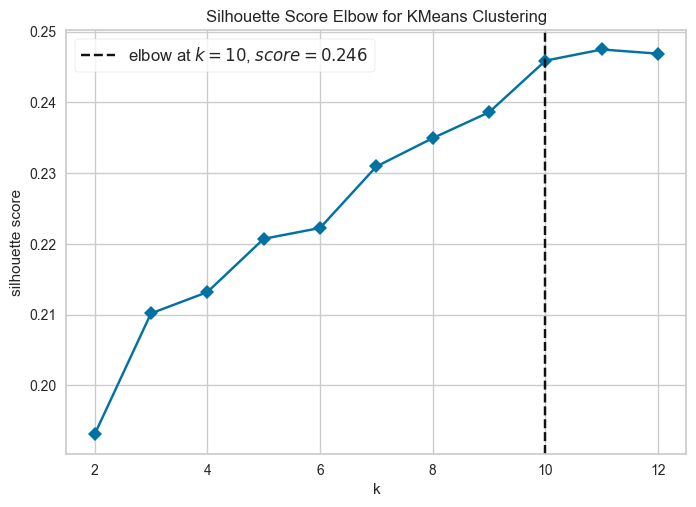

<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [189]:
from yellowbrick.cluster import KElbowVisualizer
km = KMeans (n_clusters=best_n_clusters)
visualizer = KElbowVisualizer(
    km, k=(2,13),metric ='silhouette', timings=False
)

visualizer.fit(scaled_df) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

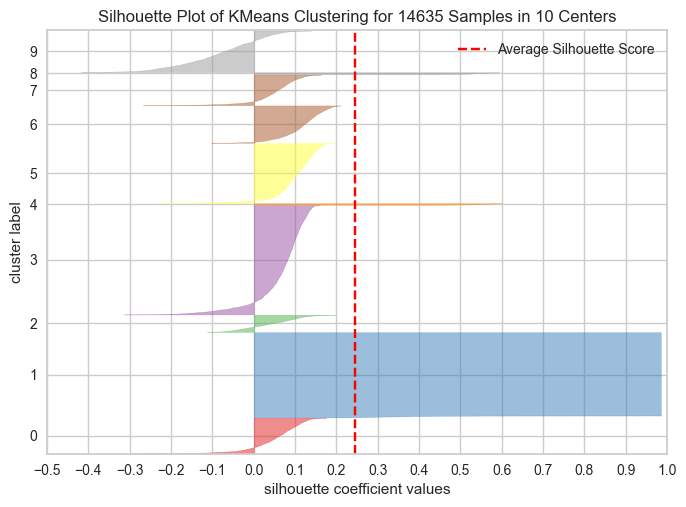

Average silhoutte score is: 0.247


In [190]:
from yellowbrick.cluster import SilhouetteVisualizer
km = KMeans (n_clusters = best_n_clusters)
visualizer = SilhouetteVisualizer(km)
visualizer.fit(scaled_df) # fit the training data to the visualizer
visualizer.poof() # Data show
print("Average silhoutte score is: " + "{:.3f}".format(max(scores)) )

# Step 4: Predictive Modeling

We split the data into train and test datasets. 
* Our predictors are every variable except complication.
* Our response variable is the In-Hospital complication.

In [191]:
from sklearn.model_selection import train_test_split

X = data.drop(['complication'], axis = 1)
y = data.complication
# creating necessary datasets to split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
len(X_train),len(X_test)

(10244, 4391)

## 4.1 : Logistic Regression Classification

In [192]:
# importing logictic regression and scoring modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='saga',max_iter=1000)
#using saga solver, because gives better scores and is faster.
lr.fit(X_train,y_train)
# create and fit model

lr_pred = lr.predict(X_test)
print(classification_report(lr_pred,y_test))
# create predictions and print classification report

              precision    recall  f1-score   support

           0       0.94      0.82      0.87      3818
           1       0.35      0.66      0.46       573

    accuracy                           0.80      4391
   macro avg       0.65      0.74      0.67      4391
weighted avg       0.86      0.80      0.82      4391



In [193]:
lr_score = accuracy_score(lr_pred,y_test)
print("Linear regression accuracy score: ",lr_score)
# print linear regression accuracy score

Linear regression accuracy score:  0.7950352994762013


In [194]:
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
#importing ROC and PR curve modules

## 4.2 : KNeightborsClassifier

First, we create an elbow method, so we can find the optimal k value with the minimum mean squared error.

In [195]:
def elbow(mse_list):
	#calculate min error k_value and return it.
	min = mse_list[0]
	for item in mse_list:
		if min > item:
			min = item
	return mse_list.index(min)+1

Using KNN with manhattan distance

In [196]:
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
#knn model for manhattan distance
manh_mse_list = list()
manh_scores = []
K = range(1,21)

#calclulating knn for every value in K
for i in K:
	man_knn = KNeighborsClassifier(i,metric="manhattan")
	man_knn.fit(X_train,y_train)
	# create and fit the model
	print("MSE for k value",i,": ",mean_squared_error(y_test,man_knn.predict(X_test)))
	manh_mse_list.append(mean_squared_error(y_test,man_knn.predict(X_test)))
	score = accuracy_score(y_test,man_knn.predict(X_test))
	manh_scores.append(score)


k_val_manhattan = elbow(manh_mse_list)
# find the best k value and print it
print("Manhattan k_value: ",k_val_manhattan)

MSE for k value 1 :  0.18127989068549305
MSE for k value 2 :  0.16306080619448873
MSE for k value 3 :  0.1503074470507857
MSE for k value 4 :  0.15235709405602368
MSE for k value 5 :  0.14370302892279663
MSE for k value 6 :  0.14711910726485994
MSE for k value 7 :  0.14142564336142108
MSE for k value 8 :  0.14575267592803462
MSE for k value 9 :  0.14347529036665907
MSE for k value 10 :  0.14461398314734686
MSE for k value 11 :  0.14119790480528355
MSE for k value 12 :  0.14506946025962195
MSE for k value 13 :  0.1398314734684582
MSE for k value 14 :  0.14620815304030974
MSE for k value 15 :  0.14028695058073332
MSE for k value 16 :  0.14689136870872238
MSE for k value 17 :  0.14142564336142108
MSE for k value 18 :  0.1443862445912093
MSE for k value 19 :  0.14119790480528355
MSE for k value 20 :  0.14598041448417218
Manhattan k_value:  13


Using KNN with euclidean distance

In [197]:
#knn model for euclidean distance
euc_mse_list = list()
K = range(1,21)
euc_scores = []
#calclulating knn for every value in K
for i in K:
	euc_knn = KNeighborsClassifier(i,metric="euclidean")
	euc_knn.fit(X_train,y_train)
	# create and fit the model
	print("MSE for k value",i,": ",mean_squared_error(y_test,euc_knn.predict(X_test)))
	euc_mse_list.append(mean_squared_error(y_test,euc_knn.predict(X_test)))
	score = accuracy_score(y_test,euc_knn.predict(X_test))
	euc_scores.append(score)

k_val_euc = elbow(euc_mse_list)
# find the best k value and print it
print("Euclidean k_value: ",k_val_euc)

MSE for k value 1 :  0.1785470280118424
MSE for k value 2 :  0.1473468458209975
MSE for k value 3 :  0.15440674106126168
MSE for k value 4 :  0.1452971988157595
MSE for k value 5 :  0.1452971988157595
MSE for k value 6 :  0.14005921202459576
MSE for k value 7 :  0.1393759963561831
MSE for k value 8 :  0.13755408790708268
MSE for k value 9 :  0.1364153951263949
MSE for k value 10 :  0.13823730357549532
MSE for k value 11 :  0.13573217945798224
MSE for k value 12 :  0.1398314734684582
MSE for k value 13 :  0.13459348667729445
MSE for k value 14 :  0.14028695058073332
MSE for k value 15 :  0.1359599180141198
MSE for k value 16 :  0.14119790480528355
MSE for k value 17 :  0.13778182646322024
MSE for k value 18 :  0.14279207469824642
MSE for k value 19 :  0.1393759963561831
MSE for k value 20 :  0.1423365975859713
Euclidean k_value:  13


Here, we plot the accuracy values of both KNN models to see which distance metric does a better job.

Text(0, 0.5, 'Accuracy')

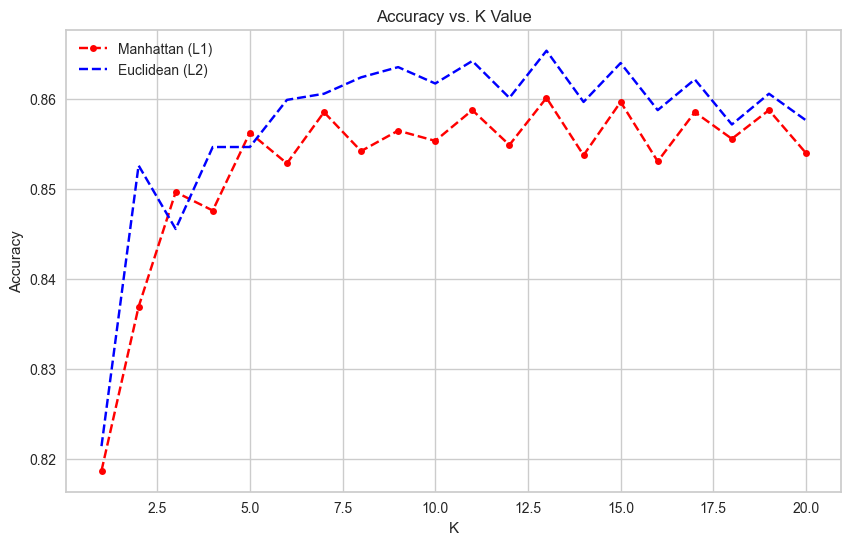

In [198]:
plt.figure(figsize=(10,6))
plt.plot(K,manh_scores,color='red', linestyle='dashed', marker='o', label='Manhattan (L1)',
 markerfacecolor='red', markersize=5)
plt.plot(K,euc_scores,color='blue', linestyle='dashed', marker='x', label='Euclidean (L2)',
 markerfacecolor='blue', markersize=5)
plt.legend()
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

As we can see in the graph, Euclidean distance does a better job. So for later use, we are going to use euclidean distance with fitting k value.

In [199]:
knn = KNeighborsClassifier(n_neighbors=k_val_euc,metric="euclidean")
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(classification_report(knn_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.85      0.92      3853
           1       0.48      0.96      0.64       538

    accuracy                           0.87      4391
   macro avg       0.73      0.91      0.78      4391
weighted avg       0.93      0.87      0.88      4391



# Step 5 : Model Evaluation and Visualization

## KNeighborsClassifier vs. Logistic Regression

In [200]:
print(classification_report(lr_pred,y_test))

print(classification_report(knn_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.82      0.87      3818
           1       0.35      0.66      0.46       573

    accuracy                           0.80      4391
   macro avg       0.65      0.74      0.67      4391
weighted avg       0.86      0.80      0.82      4391

              precision    recall  f1-score   support

           0       0.99      0.85      0.92      3853
           1       0.48      0.96      0.64       538

    accuracy                           0.87      4391
   macro avg       0.73      0.91      0.78      4391
weighted avg       0.93      0.87      0.88      4391



As we can see from the reports above,
* Logistic regression has overall accuracy of 0.80.
* KNN has overall accuracy of 0.87.
<br>

KNN outperforms the logistic regression by ~7% (0.80 to 0.87)
<br>
KNN has higher precision and recalls for all cases.

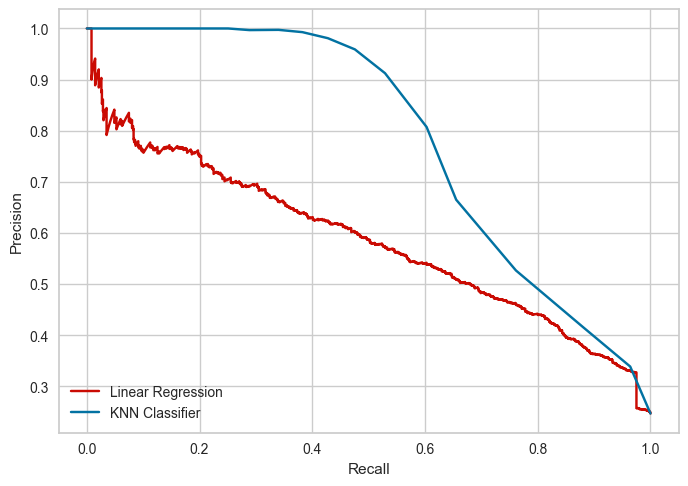

In [201]:
knn_proba = knn.predict_proba(X_test)[:,1]
lr_proba = lr.predict_proba(X_test)[:,1]

precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_test, lr_proba)
plt.plot(recall_lr,precision_lr,label = "Linear Regression",color = "r")

precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y_test, knn_proba)
plt.plot(recall_knn,precision_knn,label = "KNN Classifier",color="b")
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend(loc=3)
plt.show()

Here, we plot precision-recall graphs of the models. We can clearly see that KNN's precision-recall curve is closer to perfect curve, while LR's curve is closer to random.

Text(0.5, 1.0, 'Linear Regression Confusion Matrix')

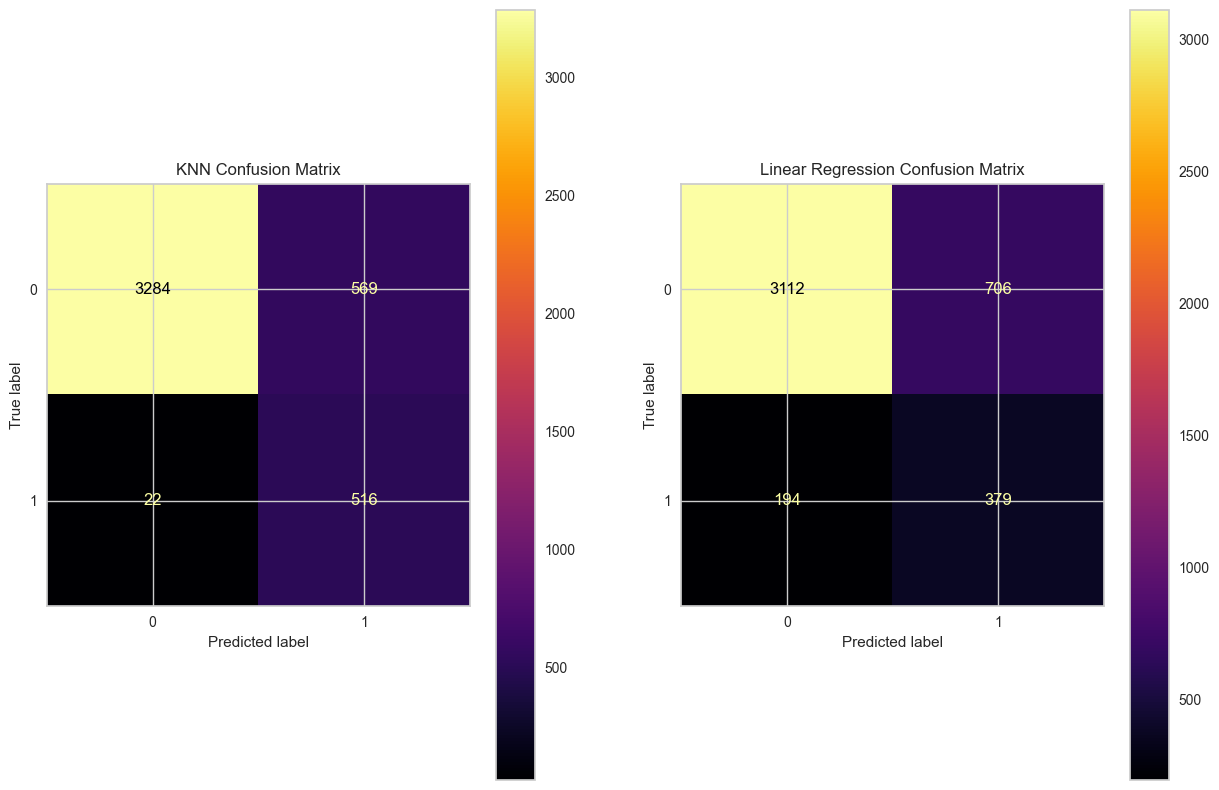

In [202]:
fig,ax = plt.subplots(ncols=2,nrows=1,figsize=(15,10))

knn_matrix = confusion_matrix(knn_pred,y_test)
disp1 = ConfusionMatrixDisplay(confusion_matrix=knn_matrix)
disp1.plot(ax=ax[0],cmap='inferno')
disp1.ax_.set_title("KNN Confusion Matrix")

lr_matrix = confusion_matrix(lr_pred,y_test)
disp2 = ConfusionMatrixDisplay(confusion_matrix=lr_matrix)
disp2.plot(ax=ax[1],cmap='inferno')
disp2.ax_.set_title("Linear Regression Confusion Matrix")

Looking at the confusion matrices above, KNN does around 20% better at finding True Negative values than linear regression model. Also KNN has much lower False Positive and False Positive values. Overall, KNN predicted 3800 labels true, while linear regression model predicted 3491 labels true.

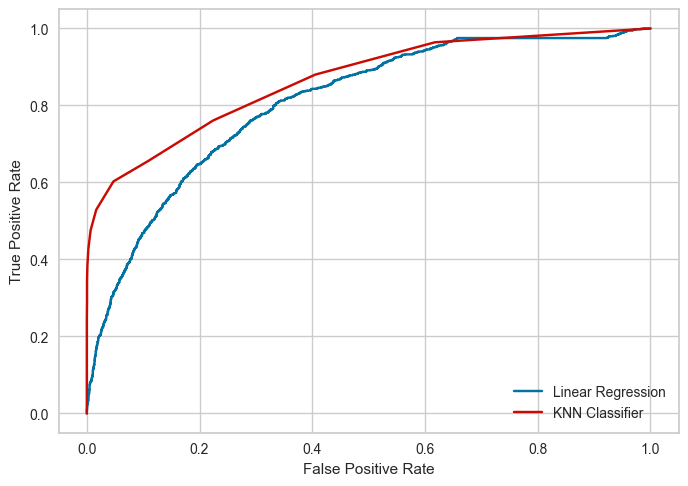

In [203]:
fpr_lr, tpr_lr, _lr = roc_curve(y_test,lr_proba)
#Linear Regression ROC curve
plt.plot(fpr_lr,tpr_lr,label="Linear Regression",color = "b")

fpr_knn, tpr_knn, _ = roc_curve(y_test,knn_proba)
#Linear Regression ROC curve
plt.plot(fpr_knn,tpr_knn,label="KNN Classifier",color = "r")

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)

Lokking at the ROC curves, KNN's graph is slightly closer to the perfect ROC curve, while linear regression is closer to random. Both models are competent and gave good scores and accuracy values. Also we can say that models are not overfitted.

# Conclusion
<br>
In this project, we trained Logistic Regression and KNeighbors classification on a surgery deepnet dataset to find with given predictors, is there a in-hospital complication or not. After visulalization,cleaning and building models, we found out that KNN with euclidean metric outperformed the logistic regression by 0.07 in accuracy and around 20% in finding the true labels. Models are closer to perfect models, but not exactly close to make them overfit.

### End Notes
We didn't really need to clean the data, as we already had a clean one but we still had to remove outliers to make data cleaner and reduce noise.
We thought that maybe removing some predictors that have close to 0 correlation with our response variable, but we concluded that removing said predictors would not work as we thought.

We had 24 predictors in the data, and that is probably why linear regression was performing worse than KNN, trying to derive a large and complex formula. Overall, we can say that our scores are good, especially KNN with almost 90% accuracy.

This has been a really fun project, and we think that we've improved greatly with this project as well. We had a lot of errors and trials, but we managed to fix most of them all. We're happy with our results and we hope that you agree with our results too.

Thank you for checking.